C:\Users\Uživatel\AppData\Local\Temp\ipykernel_15564\3203850350.py:30: RuntimeWarning: overflow encountered in exp
  Y = 1 / (1 + np.exp(-k*(x-x0)))


0.632


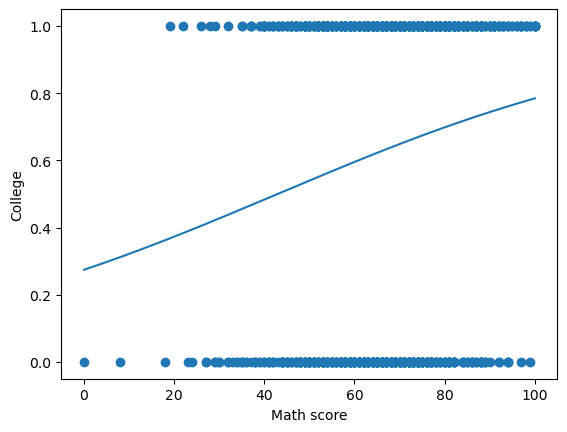

[0]


In [3]:
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

degrees = []
preparation = []
math_score = []
our_input = []

fhand = open("A:\Coding_projects\school-data-science-project\StudentsPerformance.csv")

for line in fhand:
    LineArr = line.split(",")
    degrees.append(LineArr[2])
    preparation.append(LineArr[4])
    math_score.append(float(LineArr[5].strip('\"')))

def Degrees_filter(item):
    if item == '"high school"' or item == '"some high school"':
        return 0
    return 1

def Prep_filter(item):
    if item == '"none"':
        return 0
    return 1

def sigmoid(x, x0, k):
     Y = 1 / (1 + np.exp(-k*(x-x0)))
     return Y

degrees_bool = list(map(Degrees_filter, degrees))
prep_bool = list(map(Prep_filter, preparation))

Y = degrees_bool
X = np.array([math_score]).reshape(-1,1)

popt, pcov = curve_fit(sigmoid,math_score,Y)
x1 = np.linspace(0, 100, 500)
y1 = sigmoid(x1, *popt)

logr = linear_model.LogisticRegression()
logr.fit(X,Y)
print(logr.score(X,Y))
plt.plot(x1,y1)
plt.scatter(X,Y)
plt.xlabel("Math score")
plt.ylabel("College")
plt.show()

predicted = logr.predict(np.array([40]).reshape(-1,1))
print(f"{predicted}")

0.648


C:\Users\Uživatel\AppData\Local\Temp\ipykernel_15564\1237061678.py:30: RuntimeWarning: overflow encountered in exp
  Y = 1 / (1 + np.exp(-k*(x-x0)))


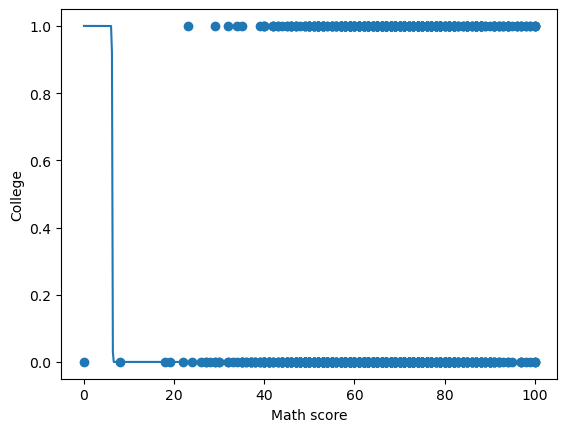

[0]


In [6]:
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

degrees = []
preparation = []
math_score = []
our_input = []

fhand = open("A:\Coding_projects\school-data-science-project\StudentsPerformance.csv")

for line in fhand:
    LineArr = line.split(",")
    degrees.append(LineArr[2])
    preparation.append(LineArr[4])
    math_score.append(float(LineArr[5].strip('\"')))

def Degrees_filter(item):
    if item == '"high school"' or item == '"some high school"':
        return 0
    return 1

def Prep_filter(item):
    if item == '"none"':
        return 0
    return 1

def sigmoid(x, x0, k):
     Y = 1 / (1 + np.exp(-k*(x-x0)))
     return Y

degrees_bool = list(map(Degrees_filter, degrees))
prep_bool = list(map(Prep_filter, preparation))

Y = prep_bool
X = np.array([math_score]).reshape(-1,1)

popt, pcov = curve_fit(sigmoid,math_score,Y)
x1 = np.linspace(0, 100, 500)
y1 = sigmoid(x1, *popt)

logr = linear_model.LogisticRegression()
logr.fit(X,Y)
print(logr.score(X,Y))
plt.plot(x1,y1)
plt.scatter(X,Y)
plt.xlabel("Math score")
plt.ylabel("College")
plt.show()

predicted = logr.predict(np.array([40]).reshape(-1,1))
print(f"{predicted}")